# Hypothesis Testing

Key Ideas <br>
<br>
Type 1 error (false positive)- Rejecting the null hypothesis when it is true <br>
Type 2 error (false negative)- failing to reject the null hypothesis when it is false <br>
<br>
Level of significance (alpha)- how wrong we are allowing ourselves to be <br>
alpha = probability of rejecting the null hypothesis when it is true- type 1 error <br>
alpha is fixed before the hypothesis test <br>
alpha does not depend on the data <br>
alpha is mostly 0.05 (5%) <br>
<br>
p-value- how likely is it that the null hypothesis is true <br>
If p-value is small, we will reject the null hypothesis <br>
p-value depends on the sample data <br>
<br>
Rejection region- reject the null hypothesis when the test statistic lies in the rejection region <br>
Else, we fail to reject it

Example <br>
It is known from experience that for a certain E-commerce company the mean delivery time is 5 days with a standard <br>
deviation of 1.3 days <br>
New manager is afraid that the company is slipping and collects a random sample of 45 orders <br>
Mean delivery time of these samples comes out to be 5.25 days <br>
<br>
Is there enough statistical evidence for the manager's apprehension that the mean delivery time is greater than 5 days?


Assumptions: <br>
Data is continuous (time) <br>
Normal distribution because sample size is greater than 30 <br>
Known population standard deviation - this is to simplify the problem, usually not the case <br>
Random sampling from the population 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

In [4]:
# Test statistic distribution- Standard Normal distribution
# When the population standard deviation is known - Z test

# H0: mu = 5 
# H1: mu > 5

mu = 5
sigma = 1.3

x_bar = 5.25

# Calculate the test statistic (AKA Z-score)
test_stat = (x_bar - mu)/(sigma/np.sqrt(45)) 
test_stat

# This means that the x_bar (5.25) is test_stat (1.29) standard deviations away from mu (5)

1.2900392177883402

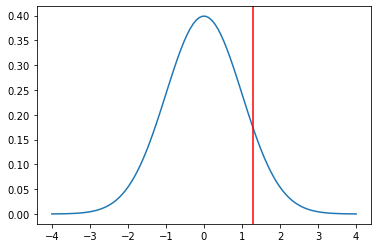

In [5]:
# Plotting the distribution of Z test statistic along with the test_statistic value

from scipy.stats import norm

x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = test_stat, c = 'r')
plt.show()

In [6]:
# What is the probability of the standard deviation being more than 1.29? --9.8%

1 - norm.cdf(test_stat)

# This means that if the null hypothesis were true (mu = 5), the chance of seeing 5.25 or more is about 10%

0.09851852092578695

Though the probability is very small, is it significant enough to reject the null hypothesis?

Rejection Region Approach <br>
Rejection region- this is how large my result is allowed to be by pure chance. If it is more, the null hypothesis <br>
should be rejected. <br>
<br>
We need to set the level of significance (alpha) for this approach <br>
To find the rejection region, we need to find the value of Z (critical value) that gives an area of alpha to the right end

In [13]:
from scipy.stats import norm

# Find the critical value
critical_val = norm.ppf(1-0.05)
critical_val
# this means the chance of being above this number is 5% under the null hypothesis

1.6448536269514722

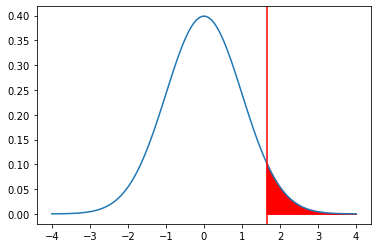

In [15]:
# plotting the test statistic distribution and indicating the acceptance and rejection region

x = np.linspace(-4, 4, 100)
plt.plot(x, norm.pdf(x,0,1))
plt.axvline(x = critical_val, c ='r')
x1 = np.linspace(critical_val, 4, 50)
plt.fill_between(x1, norm.pdf(x1, 0, 1), color = 'r')
plt.show()

Our test statistic (1.29) is not in the rejection region, so we cannot reject the null hypothesis <br>
Thus, we do not have enough statistical evidence to say that the mean delivery time is greater than 5 days

p-value Approach <br>
p-value measures the strength of evidence against the null hypothesis <br>
<br>
For this approach: <br>
Choose a level of significance (alpha) <br>
Calculate the p-value <br>
If p-value <= alpha, reject the null hypothesis

In [16]:
# Calculate the p-value
1 - norm.cdf(test_stat)

0.09851852092578695

0.098 is greater than 0.05 - so, do not reject the null hypothesis

Two-tailed Test Example

Suppose you work in the quality control team of coke. It is known from experience that the mean amount of coke in a <br>
bottle is 600 ml with a standard deviation of 50 ml. <br>
You have collected 36 randomly sampled bottles. Mean amount of coke in the 36 samples is 580 ml. <br>
Test whether the amount of coke in the bottle is different than 600 ml using 0.05 level of significance.

In [24]:
mu = 600
sigma = 50

x_bar = 580

# Calculate the test statistic (AKA Z-score)
test_stat = (x_bar - mu)/(sigma/np.sqrt(36)) 
test_stat

-2.4

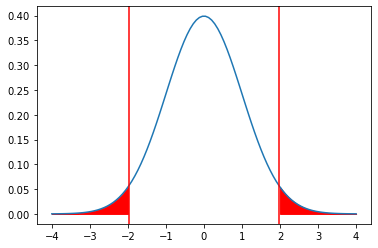

In [23]:
from scipy.stats import norm

critical_val1 = norm.ppf(1-(0.05/2))
critical_val2 = norm.ppf(0.05/2)

x = np.linspace(-4,4,100)

plt.plot(x, norm.pdf(x, 0, 1))
plt.axvline(x = critical_val1, c = 'r')
plt.axvline(x = critical_val2, c = 'r')

x1 = np.linspace(2, 4, 50)
plt.fill_between(x1, norm.pdf(x1,0,1), color = 'r')

x2 = np.linspace(-2, -4, 50)
plt.fill_between(x2, norm.pdf(x2,0,1), color = 'r')
plt.show()

-2.4 lies in the rejection region- we can reject the null hypothesis